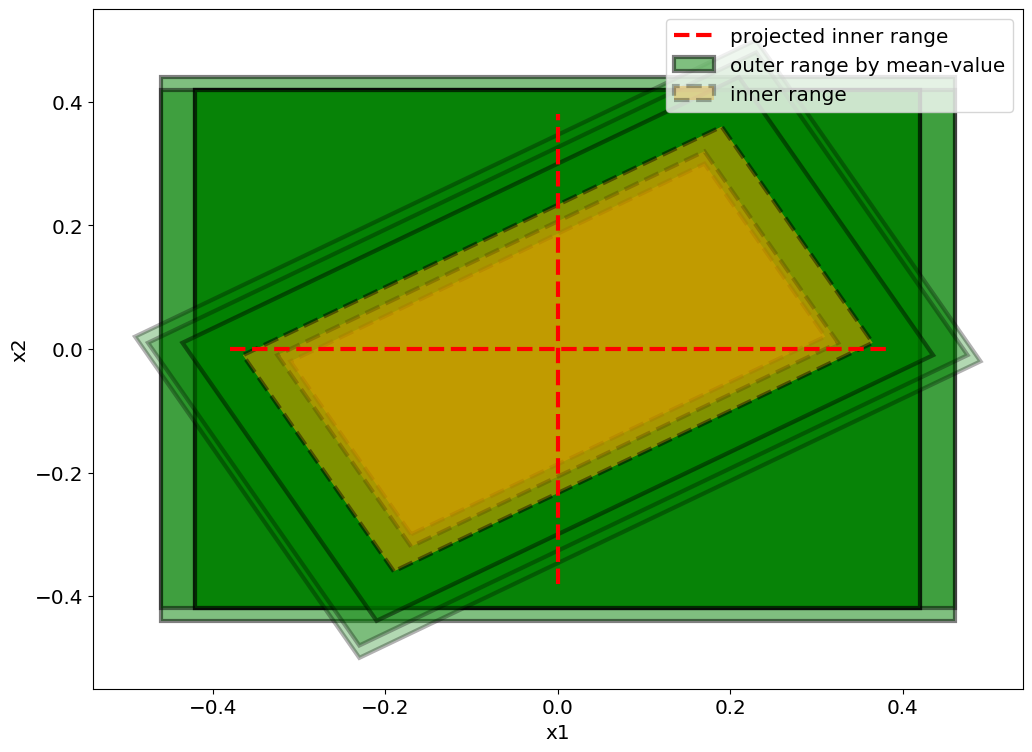

In [102]:
# convert in python script by: jupyter nbconvert --to script Visu_discrete.ipynb
# run python script by: python3 Visu_output.py --interactive=0 --printvar=-1-2- 
# or python3 Visu_output.py --interactive=0 --printvar=all (to print all variables)

# Import the necessary packages and modules
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

width_in_inches = 12
height_in_inches = 9
dots_per_inch = 100
#fig = plt.figure(figsize=(width_in_inches, height_in_inches), dpi=dots_per_inch)
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection
import os.path
from os import path

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

os.chdir('../output')

def print_discrete_xy(varx,vary):
    fxy_inner = varx + vary + 'joint_inner.out'
    fxy_skewed_inner = varx + vary + 'skewed_inner.out'
    fxy_skewed_outer = varx + vary + 'skewed_outer.out'
    fx_outer = varx + 'outer_direct.out'
    fy_outer = vary + 'outer_direct.out'
    fx_outer2 = varx + 'outer_mean_value.out'
    fy_outer2 = vary + 'outer_mean_value.out'
    fx_inner = varx + 'inner.out'
    fy_inner = vary + 'inner.out'
    if (path.isfile(fx_outer) and path.isfile(fy_outer)):
        fig, ax = plt.subplots(figsize=(width_in_inches, height_in_inches), dpi=dots_per_inch)
        
        with open(fx_outer, 'r') as x_outer, open(fx_outer2, 'r') as x_outer2, open(fy_outer, 'r') as y_outer, open(fy_outer2, 'r') as y_outer2:
            linesx_outer = x_outer.readlines()
            xmin_outer = [float(line.split()[0]) for line in linesx_outer]
            xmax_outer = [float(line.split()[1]) for line in linesx_outer]
            linesx_outer2 = x_outer2.readlines()
            xmin_outer2 = [float(line.split()[0]) for line in linesx_outer2]
            xmax_outer2 = [float(line.split()[1]) for line in linesx_outer2]
            linesy_outer = y_outer.readlines()
            ymin_outer = [float(line.split()[0]) for line in linesy_outer]
            ymax_outer = [float(line.split()[1]) for line in linesy_outer]
            linesy_outer2 = y_outer2.readlines()
            ymin_outer2 = [float(line.split()[0]) for line in linesy_outer2]
            ymax_outer2 = [float(line.split()[1]) for line in linesy_outer2]

            for xo1,xo2,yo1,yo2 in zip(xmin_outer2,xmax_outer2,ymin_outer2,ymax_outer2):
                car_fig = Rectangle([xo1,yo1],xo2-xo1,yo2-yo1,  color='green', ec='black', linewidth=3, alpha=0.5)
                ax.add_patch(car_fig)
            car_fig = Rectangle([xo1,yo1],xo2-xo1,yo2-yo1, label='outer range by mean-value', color='green', ec='black', linewidth=3, alpha=0.5)
            ax.add_patch(car_fig)
        #   for xo1,xo2,yo1,yo2 in zip(xmin_outer,xmax_outer,ymin_outer,ymax_outer):
         #       car_fig = Rectangle([xo1,yo1],xo2-xo1,yo2-yo1, label='direct outer range', ec='black', linewidth=3, alpha=0.5)
          #      ax.add_patch(car_fig)
          
           
         
        if (path.isfile(fxy_skewed_outer)):
            with open(fxy_skewed_outer, 'r') as xy_skewed_outer:
                linesxy_skewed_outer = xy_skewed_outer.readlines()
                x1_outer = [float(line.split()[0]) for line in linesxy_skewed_outer]
                y1_outer = [float(line.split()[1]) for line in linesxy_skewed_outer]
                x2_outer = [float(line.split()[2]) for line in linesxy_skewed_outer]
                y2_outer = [float(line.split()[3]) for line in linesxy_skewed_outer]
                x3_outer = [float(line.split()[4]) for line in linesxy_skewed_outer]
                y3_outer = [float(line.split()[5]) for line in linesxy_skewed_outer]
                x4_outer = [float(line.split()[6]) for line in linesxy_skewed_outer]
                y4_outer = [float(line.split()[7]) for line in linesxy_skewed_outer]
                
                for xi1,yi1,xi2,yi2,xi3,yi3,xi4,yi4 in zip(x1_outer,y1_outer,x2_outer,y2_outer,x3_outer,y3_outer,x4_outer,y4_outer):
                    car_fig = Polygon([(xi1,yi1), (xi2,yi2), (xi3,yi3), (xi4,yi4)], color='green', ec='black', linewidth=3,alpha=0.3)
                    ax.add_patch(car_fig)
        
        with open(fxy_inner, 'r') as xy_inner:
            linesxy_inner = xy_inner.readlines()     
            xmin_inner = [float(line.split()[0]) for line in linesxy_inner]
            xmax_inner = [float(line.split()[1]) for line in linesxy_inner]
            ymin_inner = [float(line.split()[2]) for line in linesxy_inner]
            ymax_inner = [float(line.split()[3]) for line in linesxy_inner]
          
            for xi1,xi2,yi1,yi2 in zip(xmin_inner,xmax_inner,ymin_inner,ymax_inner):
                car_fig2 = Rectangle([xi1,yi1],xi2-xi1,yi2-yi1, color='orange', ec='black', linestyle='--', linewidth=3 ,alpha=0.5)
                ax.add_patch(car_fig2)
            car_fig2 = Rectangle([xi1,yi1],xi2-xi1,yi2-yi1, label='inner range', color='orange', ec='black', linestyle='--', linewidth=3,alpha=0.3)
            ax.add_patch(car_fig2)
        
        with open(fx_inner, 'r') as x_inner, open(fy_inner, 'r') as y_inner: 
            linesx_inner = x_inner.readlines()
            xmin_inner = [float(line.split()[0]) for line in linesx_inner]
            xmax_inner = [float(line.split()[1]) for line in linesx_inner]
            linesy_inner = y_inner.readlines()
            ymin_inner = [float(line.split()[0]) for line in linesy_inner]
            ymax_inner = [float(line.split()[1]) for line in linesy_inner]
            plt.plot([xmin_inner, xmax_inner], [0,0], color='red', linestyle='--', linewidth=3)
            plt.plot([0,0], [ymin_inner, ymax_inner], color='red', linestyle='--', linewidth=3, label='projected inner range')

        if (path.isfile(fxy_skewed_inner)):
            with open(fxy_skewed_inner, 'r') as xy_skewed_inner:
                linesxy_skewed_inner = xy_skewed_inner.readlines()
                x1_inner = [float(line.split()[0]) for line in linesxy_skewed_inner]
                y1_inner = [float(line.split()[1]) for line in linesxy_skewed_inner]
                x2_inner = [float(line.split()[2]) for line in linesxy_skewed_inner]
                y2_inner = [float(line.split()[3]) for line in linesxy_skewed_inner]
                x3_inner = [float(line.split()[4]) for line in linesxy_skewed_inner]
                y3_inner = [float(line.split()[5]) for line in linesxy_skewed_inner]
                x4_inner = [float(line.split()[6]) for line in linesxy_skewed_inner]
                y4_inner = [float(line.split()[7]) for line in linesxy_skewed_inner]
                
                for xi1,yi1,xi2,yi2,xi3,yi3,xi4,yi4 in zip(x1_inner,y1_inner,x2_inner,y2_inner,x3_inner,y3_inner,x4_inner,y4_inner):
                    car_fig = Polygon([(xi1,yi1), (xi2,yi2), (xi3,yi3), (xi4,yi4)], color='orange', ec='black', linestyle='--', linewidth=3,alpha=0.3)
                    ax.add_patch(car_fig)
        
        #for i in range(N):
    #polygon = Polygon(np.random.rand(N, 2), True)
    #patches.append(polygon)

#colors = 100*np.random.rand(len(patches))
#p = PatchCollection(patches, alpha=0.4)
#p.set_array(np.array(colors))
#ax.add_collection(p)
#fig.colorbar(p, ax=ax)
        
        
        ax.autoscale()
        ax.set_xlabel(varx,fontsize="x-large")
        ax.set_ylabel(vary,fontsize="x-large")
#        plt.legend(fontsize="x-large",loc='center')
        plt.legend(fontsize="x-large")
        f_output= varx + vary
        plt.savefig(f_output)
        
        
        
       # car_fig = Rectangle([-20.2,-20.2],41.2,41.2)
       # ax.add_patch(car_fig)
        
        plt.show() 
        plt.close()

print_discrete_xy("x1","x2")